In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
cumulative_return = pd.DataFrame()

In [56]:
df = pd.read_csv('results_7d.csv')

In [57]:
def calculate_cumulative_log_return(df):
    # This function calculates the cumulative sum of log returns.
    # This is done by cumulatively summing up the daily log returns.
    cumulative_log_return = df['log_return'].cumsum()
    
    return cumulative_log_return.copy()

def handle_y_test(y_test):
    y_test = pd.DataFrame(y_test)
    y_test = y_test.rename(columns={'return': 'log_return'})
    return y_test

In [58]:
# Cumulative log return


import matplotlib.dates as mdates
cumulative_return['date'] = df['date']

predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_7d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_7d_pred'] = y_pred.cumsum().copy()


In [59]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_7d_conf_matrix)


[[397 376]
 [323 553]]


In [60]:
# Classification report
from sklearn.metrics import classification_report
results_7d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_7d_class_report)

              precision    recall  f1-score   support

          -1       0.55      0.51      0.53       773
           1       0.60      0.63      0.61       876

    accuracy                           0.58      1649
   macro avg       0.57      0.57      0.57      1649
weighted avg       0.57      0.58      0.57      1649



In [61]:
df = pd.read_csv('results_30d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_30d_test'] = df['return'].cumsum()

cumulative_return['btc_30d_pred'] = y_pred.cumsum()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_30d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_30d_class_report)

[[397 376]
 [323 553]]
              precision    recall  f1-score   support

          -1       0.55      0.51      0.53       773
           1       0.60      0.63      0.61       876

    accuracy                           0.58      1649
   macro avg       0.57      0.57      0.57      1649
weighted avg       0.57      0.58      0.57      1649



In [62]:
df = pd.read_csv('results_30d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_30d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_30d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_30d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_30d_class_report)

[[397 376]
 [323 553]]
              precision    recall  f1-score   support

          -1       0.55      0.51      0.53       773
           1       0.60      0.63      0.61       876

    accuracy                           0.58      1649
   macro avg       0.57      0.57      0.57      1649
weighted avg       0.57      0.58      0.57      1649



In [63]:

df = pd.read_csv('results_180d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_180d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_180d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_180d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_180d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_180d_class_report)


[[693  80]
 [767 109]]
              precision    recall  f1-score   support

          -1       0.47      0.90      0.62       773
           1       0.58      0.12      0.20       876

    accuracy                           0.49      1649
   macro avg       0.53      0.51      0.41      1649
weighted avg       0.53      0.49      0.40      1649



In [64]:

df = pd.read_csv('results_365d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_365d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_365d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_365d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_365d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_365d_class_report)

[[ 46 727]
 [ 41 835]]
              precision    recall  f1-score   support

          -1       0.53      0.06      0.11       773
           1       0.53      0.95      0.68       876

    accuracy                           0.53      1649
   macro avg       0.53      0.51      0.40      1649
weighted avg       0.53      0.53      0.41      1649



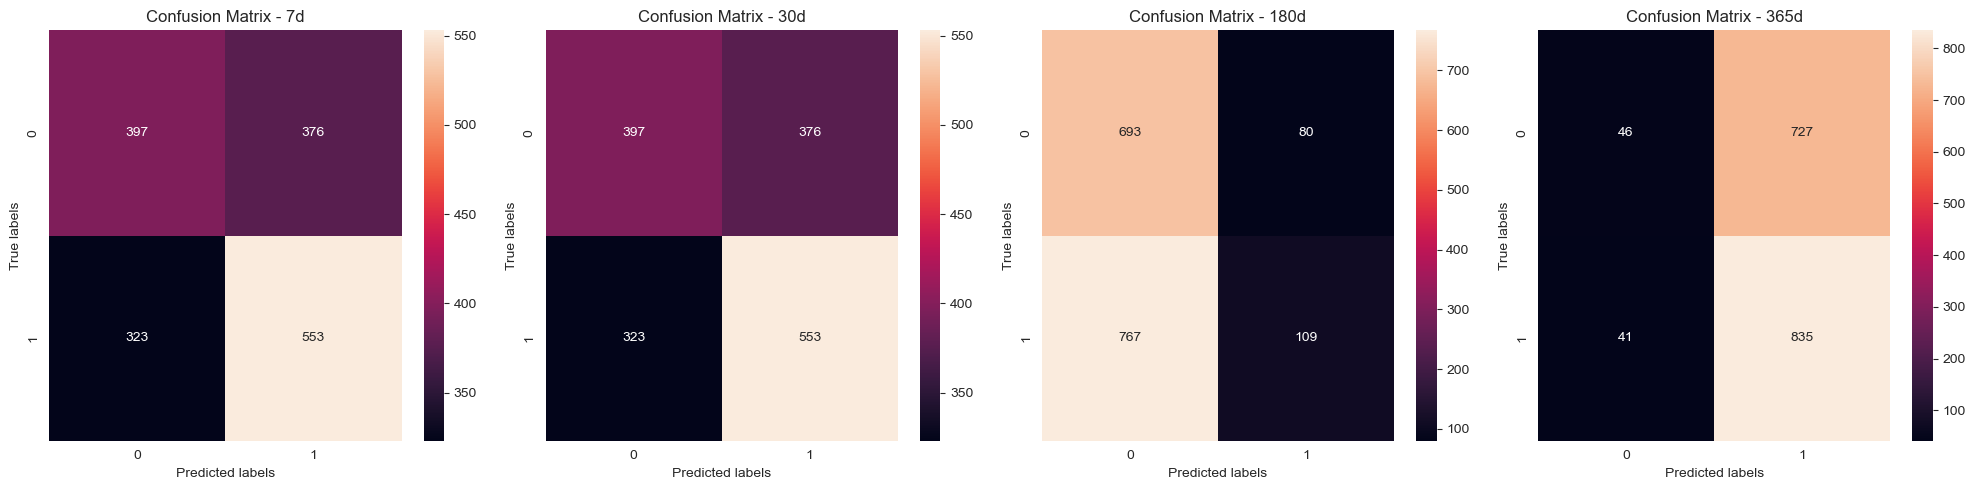

In [65]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_7d_conf_matrix, results_30d_conf_matrix, results_180d_conf_matrix, results_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('btc_confusion_matrices.png')
plt.show()

In [66]:
cumulative_return.to_csv('btc_cumulative_return.csv')

# ToBeContinued....


In [68]:
cumulative_return = pd.DataFrame()

In [69]:
df = pd.read_csv('results_ew_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM


cumulative_return['ew_7d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_7d_pred'] = y_pred.cumsum().copy()

results_ew_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_7d_conf_matrix)

results_ew_7d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_ew_7d_class_report)


[[607   0]
 [128 914]]
              precision    recall  f1-score   support

          -1       0.83      1.00      0.90       607
           1       1.00      0.88      0.93      1042

    accuracy                           0.92      1649
   macro avg       0.91      0.94      0.92      1649
weighted avg       0.94      0.92      0.92      1649



In [70]:
df = pd.read_csv('results_ew_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_30d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_30d_pred'] = y_pred.cumsum().copy()
    
results_ew_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_30d_conf_matrix)

results_ew_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_ew_30d_class_report)


[[524  83]
 [151 891]]
              precision    recall  f1-score   support

          -1       0.78      0.86      0.82       607
           1       0.91      0.86      0.88      1042

    accuracy                           0.86      1649
   macro avg       0.85      0.86      0.85      1649
weighted avg       0.86      0.86      0.86      1649



In [71]:
df = pd.read_csv('results_ew_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_180d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_180d_pred'] = y_pred.cumsum().copy()

results_ew_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_180d_conf_matrix)

results_ew_180d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_ew_180d_class_report)


[[ 541   66]
 [  11 1031]]
              precision    recall  f1-score   support

          -1       0.98      0.89      0.93       607
           1       0.94      0.99      0.96      1042

    accuracy                           0.95      1649
   macro avg       0.96      0.94      0.95      1649
weighted avg       0.95      0.95      0.95      1649



In [73]:
df = pd.read_csv('results_ew_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_365d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_365d_pred'] = y_pred.cumsum().copy()

results_ew_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_365d_conf_matrix)

results_ew_365d_class_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_ew_365d_class_report)

[[510  97]
 [208 834]]
              precision    recall  f1-score   support

          -1       0.71      0.84      0.77       607
           1       0.90      0.80      0.85      1042

    accuracy                           0.82      1649
   macro avg       0.80      0.82      0.81      1649
weighted avg       0.83      0.82      0.82      1649



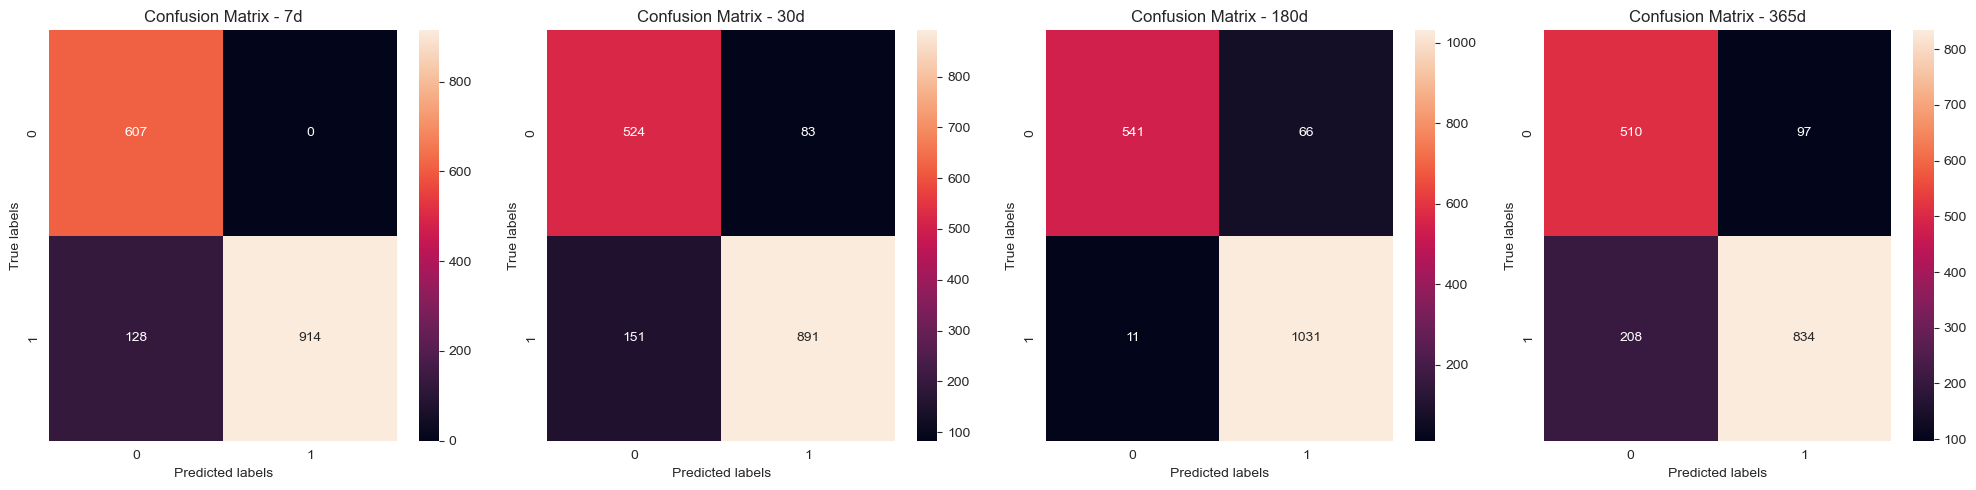

In [74]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_ew_7d_conf_matrix, results_ew_30d_conf_matrix, results_ew_180d_conf_matrix, results_ew_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('ew_confusion_matrices.png')
plt.show()


In [75]:
cumulative_return.to_csv('ew_cumulative_return.csv')

In [77]:
cumulative_return = pd.DataFrame()

In [78]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_7d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_7d_conf_matrix)

results_port_l_30_300_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_7d_classification_report)


[[668   0]
 [119 862]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92       668
           1       1.00      0.88      0.94       981

    accuracy                           0.93      1649
   macro avg       0.92      0.94      0.93      1649
weighted avg       0.94      0.93      0.93      1649



In [80]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_30d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_30d_conf_matrix)
    
results_port_l_30_300_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_30d_classification_report)

[[554 114]
 [  0 981]]
              precision    recall  f1-score   support

          -1       1.00      0.83      0.91       668
           1       0.90      1.00      0.95       981

    accuracy                           0.93      1649
   macro avg       0.95      0.91      0.93      1649
weighted avg       0.94      0.93      0.93      1649



In [81]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_180d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_180d_conf_matrix)

results_port_l_30_300_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_180d_classification_report)

[[505 163]
 [  0 981]]
              precision    recall  f1-score   support

          -1       1.00      0.76      0.86       668
           1       0.86      1.00      0.92       981

    accuracy                           0.90      1649
   macro avg       0.93      0.88      0.89      1649
weighted avg       0.92      0.90      0.90      1649



In [82]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_365d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_365d_conf_matrix)

results_port_l_30_300_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_365d_classification_report)

[[570  98]
 [  8 973]]
              precision    recall  f1-score   support

          -1       0.99      0.85      0.91       668
           1       0.91      0.99      0.95       981

    accuracy                           0.94      1649
   macro avg       0.95      0.92      0.93      1649
weighted avg       0.94      0.94      0.93      1649



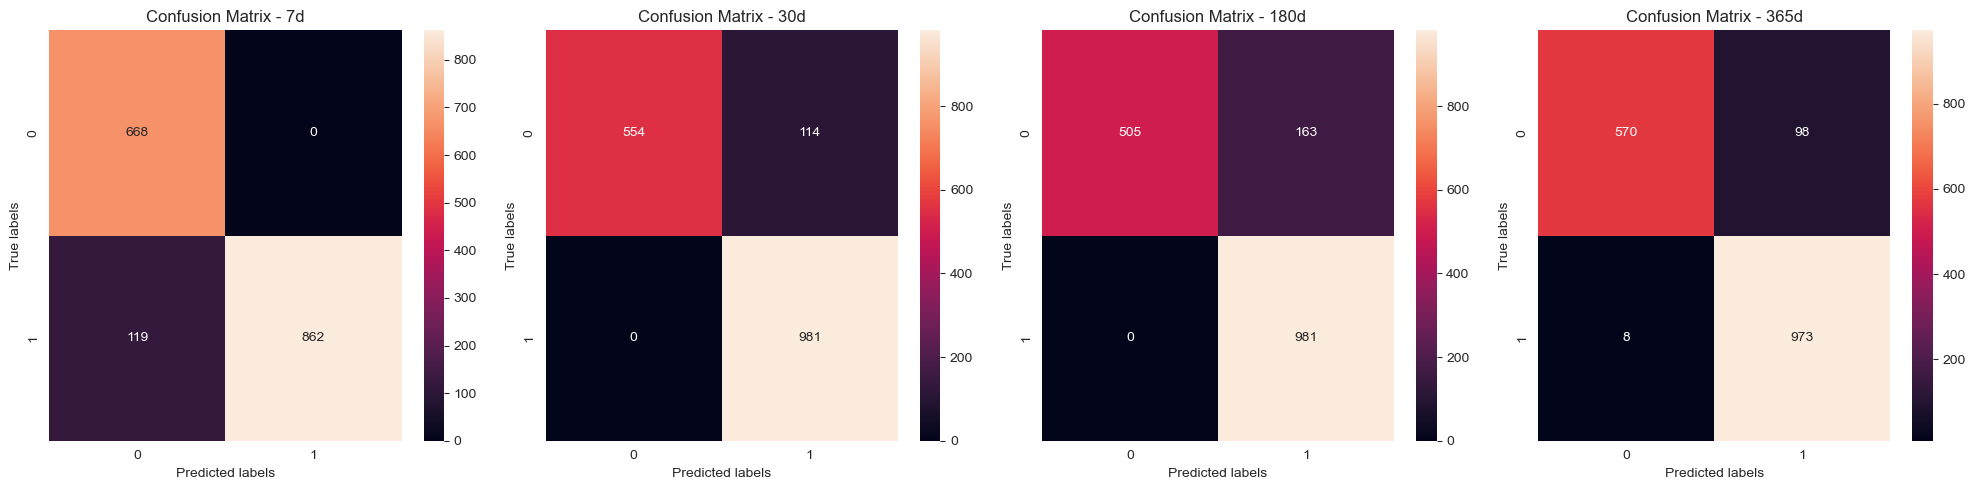

In [83]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_l_30_300_7d_conf_matrix, results_port_l_30_300_30d_conf_matrix, results_port_l_30_300_180d_conf_matrix, results_port_l_30_300_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_l_30_300_confusion_matrices.png')
plt.show()

In [84]:
cumulative_return.to_csv('port_l_30_300_cumulative_return.csv')

In [85]:
cumulative_return = pd.DataFrame()


In [86]:
df = pd.read_csv('results_portfolio_losers_window_365_assets_100_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM
    
cumulative_return['port_l_365_100_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_7d_pred'] = y_pred.cumsum().copy()
    
results_port_l_365_100_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_7d_conf_matrix)

results_port_l_365_100_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_7d_classification_report)


[[690   8]
 [ 41 910]]
              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       698
           1       0.99      0.96      0.97       951

    accuracy                           0.97      1649
   macro avg       0.97      0.97      0.97      1649
weighted avg       0.97      0.97      0.97      1649



In [87]:
df = pd.read_csv('results_portfolio_losers_window_365_assets_100_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_30d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_30d_conf_matrix)

results_port_l_365_100_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_30d_classification_report)


[[613  85]
 [  6 945]]
              precision    recall  f1-score   support

          -1       0.99      0.88      0.93       698
           1       0.92      0.99      0.95       951

    accuracy                           0.94      1649
   macro avg       0.95      0.94      0.94      1649
weighted avg       0.95      0.94      0.94      1649



In [89]:

df = pd.read_csv('results_portfolio_losers_window_365_assets_100_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_180d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_180d_conf_matrix)

results_port_l_365_100_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_180d_classification_report)

[[663  35]
 [ 25 926]]
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       698
           1       0.96      0.97      0.97       951

    accuracy                           0.96      1649
   macro avg       0.96      0.96      0.96      1649
weighted avg       0.96      0.96      0.96      1649



In [90]:

df = pd.read_csv('results_portfolio_losers_window_365_assets_100_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_365d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_365d_conf_matrix)

results_port_l_365_100_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_365d_classification_report)

[[655  43]
 [  5 946]]
              precision    recall  f1-score   support

          -1       0.99      0.94      0.96       698
           1       0.96      0.99      0.98       951

    accuracy                           0.97      1649
   macro avg       0.97      0.97      0.97      1649
weighted avg       0.97      0.97      0.97      1649



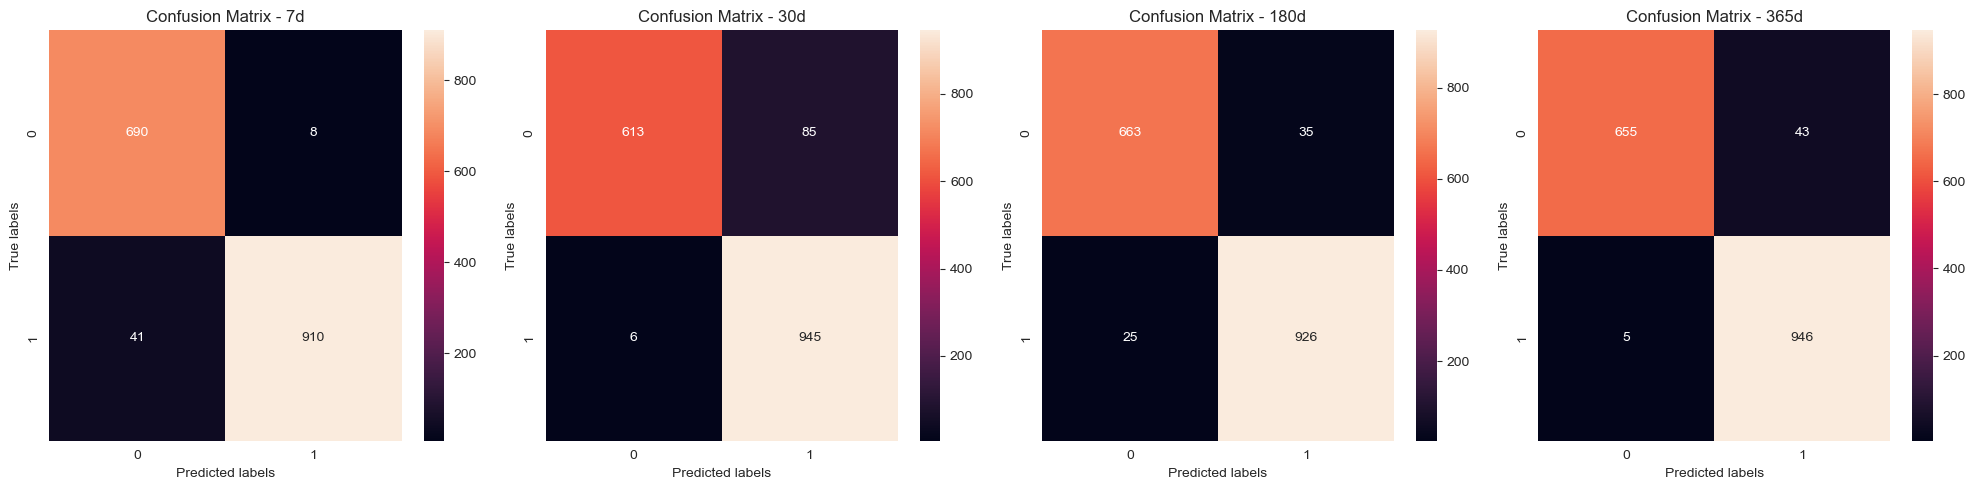

In [91]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_l_365_100_7d_conf_matrix, results_port_l_365_100_30d_conf_matrix, results_port_l_365_100_180d_conf_matrix, results_port_l_365_100_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_l_365_100_confusion_matrices.png')
plt.show()


In [92]:
cumulative_return.to_csv('port_l_365_100_cumulative_return.csv')


In [93]:
cumulative_return = pd.DataFrame()

In [94]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_7d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_7d_conf_matrix)

results_port_w_1_300_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_7d_classification_report)

[[ 578   29]
 [  42 1000]]
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       607
           1       0.97      0.96      0.97      1042

    accuracy                           0.96      1649
   macro avg       0.95      0.96      0.95      1649
weighted avg       0.96      0.96      0.96      1649



In [95]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_30d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_30d_conf_matrix)

results_port_w_1_300_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_30d_classification_report)


[[ 582   25]
 [  17 1025]]
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       607
           1       0.98      0.98      0.98      1042

    accuracy                           0.97      1649
   macro avg       0.97      0.97      0.97      1649
weighted avg       0.97      0.97      0.97      1649



In [96]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_180d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_180d_conf_matrix)

results_port_w_1_300_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_180d_classification_report)

[[600   7]
 [ 79 963]]
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93       607
           1       0.99      0.92      0.96      1042

    accuracy                           0.95      1649
   macro avg       0.94      0.96      0.95      1649
weighted avg       0.95      0.95      0.95      1649



In [97]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_365d_pred'] = y_pred.cumsum().copy()
    
results_port_w_1_300_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_365d_conf_matrix)

results_port_w_1_300_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_365d_classification_report)

[[554  53]
 [199 843]]
              precision    recall  f1-score   support

          -1       0.74      0.91      0.81       607
           1       0.94      0.81      0.87      1042

    accuracy                           0.85      1649
   macro avg       0.84      0.86      0.84      1649
weighted avg       0.87      0.85      0.85      1649



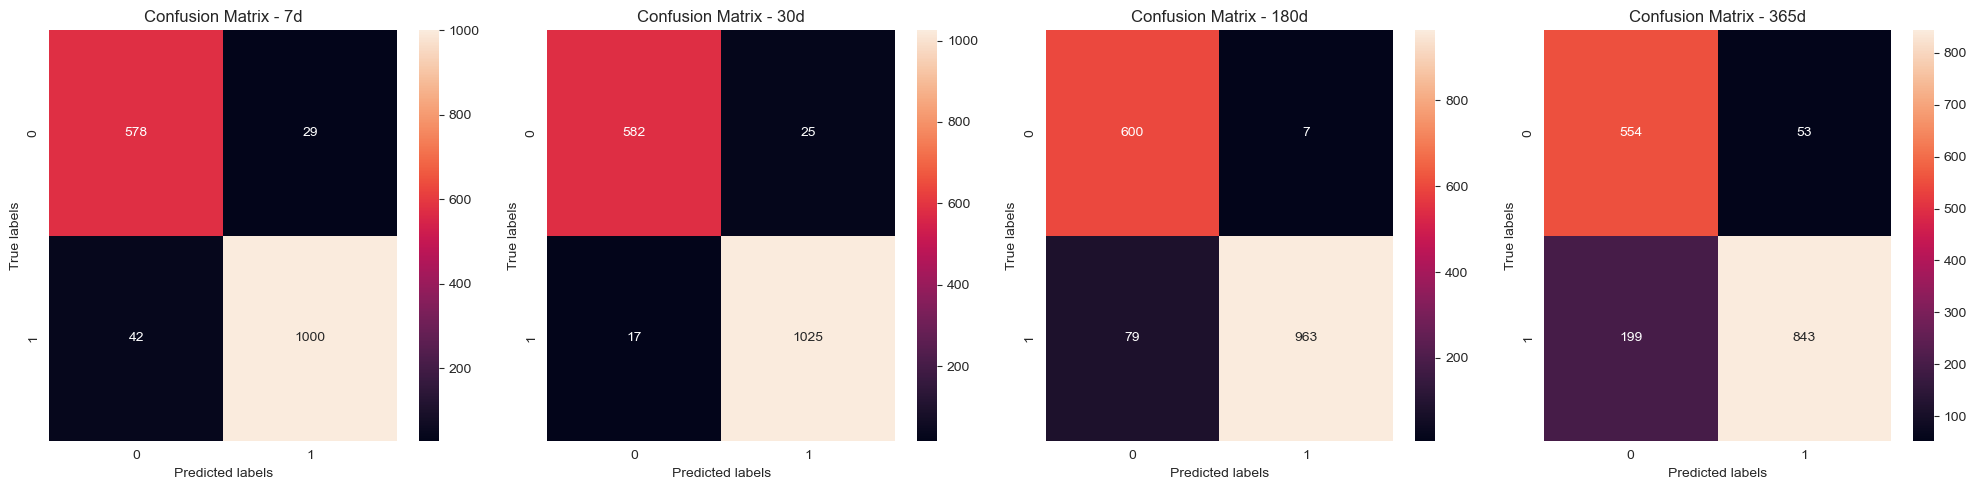

In [98]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_w_1_300_7d_conf_matrix, results_port_w_1_300_30d_conf_matrix, results_port_w_1_300_180d_conf_matrix, results_port_w_1_300_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_w_1_300_confusion_matrices.png')
plt.show()

In [99]:
cumulative_return.to_csv('port_w_1_300_cumulative_return.csv')